In [1]:
import pandas as pd
import numpy as np

In [2]:
ctg = pd.read_csv(r'D:\Datasets\CTG.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
ctg_train, ctg_test = train_test_split(ctg, test_size = .2)

In [5]:
df2 = ctg_train[ctg_train.NSP == 2]
df3 = ctg_train[ctg_train.NSP == 3]
ctg_train = pd.concat([ctg_train, df2, df3, df3])

In [6]:
ctg_train_x  = ctg_train.iloc[: , 0:-1]
ctg_train_y  = ctg_train.iloc[: , -1]

In [7]:
ctg_test_x  = ctg_test.iloc[: , 0:-1]
ctg_test_y  = ctg_test.iloc[: , -1]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [9]:
knn.fit(ctg_train_x, ctg_train_y)

KNeighborsClassifier()

In [10]:
pred_ctg = knn.predict(ctg_test_x)

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
tab_ctg = confusion_matrix(ctg_test_y, pred_ctg)
tab_ctg

array([[305,  23,  14],
       [ 19,  25,   9],
       [ 15,   2,  14]], dtype=int64)

In [13]:
accuracy = tab_ctg.diagonal().sum()/tab_ctg.sum()
accuracy

0.8075117370892019

In [14]:
empty_list = []
k_list = []
for i in range(1,51):
    k_list.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(ctg_train_x, ctg_train_y)
    pred_ctg_knn = knn.predict(ctg_test_x)
    confusion_matrix_knn = confusion_matrix(ctg_test_y, pred_ctg_knn)
    Over_all_Accuracy = confusion_matrix_knn.diagonal().sum() / confusion_matrix_knn.sum()
    empty_list.append(Over_all_Accuracy)    

In [15]:
## empty_list

num = list(range(1,51))
import matplotlib.pyplot as plt

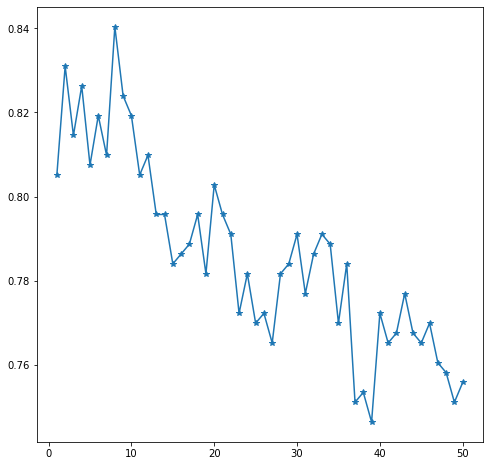

In [16]:
plt.figure(figsize = (8,8))
plt.plot(k_list, empty_list, marker = '*')
xlabel = k_list

# Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [18]:
nb.fit(ctg_train_x, ctg_train_y)

MultinomialNB()

In [19]:
pred_nb = nb.predict(ctg_test_x)

In [20]:
tab_nb = confusion_matrix(ctg_test_y, pred_nb) 
tab_nb

array([[342,   0,   0],
       [ 53,   0,   0],
       [ 31,   0,   0]], dtype=int64)